In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('loan_data.csv')

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [15]:
df['Dependents']=df['Dependents'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)

In [16]:
for col in df.describe(include='object'):
    print(col)
    print(df[col].unique())

Loan_ID
['LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001013' 'LP001024'
 'LP001029' 'LP001030' 'LP001032' 'LP001036' 'LP001038' 'LP001043'
 'LP001047' 'LP001068' 'LP001073' 'LP001086' 'LP001095' 'LP001097'
 'LP001098' 'LP001112' 'LP001116' 'LP001119' 'LP001120' 'LP001131'
 'LP001138' 'LP001144' 'LP001146' 'LP001151' 'LP001155' 'LP001157'
 'LP001164' 'LP001179' 'LP001194' 'LP001195' 'LP001197' 'LP001199'
 'LP001205' 'LP001206' 'LP001222' 'LP001228' 'LP001238' 'LP001241'
 'LP001245' 'LP001248' 'LP001255' 'LP001259' 'LP001265' 'LP001275'
 'LP001279' 'LP001282' 'LP001316' 'LP001319' 'LP001322' 'LP001325'
 'LP001327' 'LP001333' 'LP001334' 'LP001343' 'LP001345' 'LP001367'
 'LP001384' 'LP001385' 'LP001430' 'LP001431' 'LP001432' 'LP001473'
 'LP001478' 'LP001482' 'LP001487' 'LP001489' 'LP001491' 'LP001493'
 'LP001507' 'LP001514' 'LP001518' 'LP001520' 'LP001528' 'LP001532'
 'LP001535' 'LP001560' 'LP001565' 'LP001572' 'LP001577' 'LP001578'
 'LP001579' 'LP001586' 'LP001603' 'LP001606' 'LP001608

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
#how many male and female do we have
gender = df['Gender'].value_counts()
gender

Gender
Male      245
Female     63
Name: count, dtype: int64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

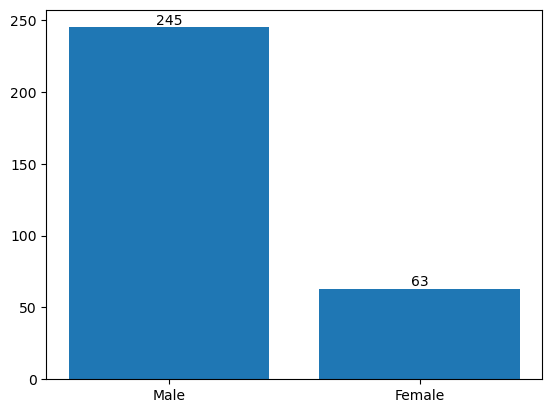

In [20]:
plt.bar(gender.index, gender.values)
for i in range(len(gender)):
    plt.text(i, gender.values[i], str(gender.values[i]), ha='center', va='bottom')


In [21]:
married = df['Married'].value_counts()
print(married)

Married
Yes    185
No     123
Name: count, dtype: int64


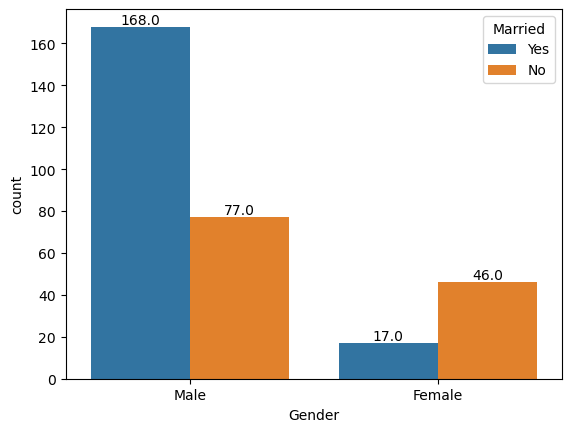

In [22]:
sns.countplot(x='Gender', hue='Married', data=df)
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

In [23]:
#how many married people have dependent
dependent = df['Dependents'].value_counts()
dependet

NameError: name 'dependet' is not defined

In [ ]:
dependent

In [ ]:
education = df['Education'].value_counts()
print(education)

In [ ]:
plt.bar(education.index, education.values)
for i in range(len(education)):
    plt.text(i, education.values[i], str(education.values[i]), ha='center', va='bottom')


In [ ]:
sns.countplot(x='Education', hue='Gender', data=df)
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

In [ ]:
#how many married people are self employed
sns.countplot(x='Self_Employed', hue='Married', data=df)
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

In [ ]:
df.columns

In [ ]:
#loan is given on basis of aplicant income. so we will find the average income....and find how to loan id are greater than this average applicant income
income = df['ApplicantIncome'].mean()
income

In [ ]:
most_loan_ask = df['LoanAmount'].mode()[0]
most_loan_ask 

In [ ]:
df

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()

In [24]:
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,1
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
379,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1


In [26]:
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
X = df[['Self_Employed','ApplicantIncome','LoanAmount']]
y = df['Loan_Status']

In [29]:
X_train,X_test, y_train,y_test =train_test_split(X,y, random_state=42, test_size=0.2)

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


C:\Users\kirti\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test)

In [41]:
c_m = confusion_matrix(y_test,  y_pred)

In [42]:
c_m

array([[20,  0],
       [42,  0]], dtype=int64)